<a href="https://colab.research.google.com/github/Prachi-110/NYC-Airbnb-Data-Anyalsis/blob/main/NYC_Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NYC Airbnb Data Analysis

Summary
* Performed basic queries on pandas DataFrame objects.
* Created simple data visualizations using pandas.

E1. Downloaded the file [AB_nyc_house_2019.csv](https://drive.google.com/file/d/1KP27Vhuq8tJXgqKhLYQwU216UJm70ZnR/view?usp=sharing) and called `read_csv` to load the data.

In [2]:
import pandas as pd

df= pd.read_csv('AB_nyc_house_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


E2. Called `describe` and then `info` to get an overview of the data-set.

In [3]:
# call describe()
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901717e+07,6.762133e+07,40.728951,-73.952170,152.722277,7.030024,23.274901,1.373249,7.144067,112.779789
std,1.098322e+07,7.861123e+07,0.054529,0.046157,240.156368,20.510755,44.550934,1.680455,32.952851,131.623195
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471919e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
# call info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48894 non-null  int64  
 1   name                            48878 non-null  object 
 2   host_id                         48894 non-null  int64  
 3   host_name                       48873 non-null  object 
 4   neighbourhood_group             48894 non-null  object 
 5   neighbourhood                   48894 non-null  object 
 6   latitude                        48894 non-null  float64
 7   longitude                       48894 non-null  float64
 8   room_type                       48894 non-null  object 
 9   price                           48894 non-null  int64  
 10  minimum_nights                  48894 non-null  int64  
 11  number_of_reviews               48894 non-null  int64  
 12  last_review                     

E3. Called `head` to inspect the first 5 rows of the data-set.

In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


E4. Used the `hist` function with no arguments to generate a histogram of the `price` field of the entire data-set.

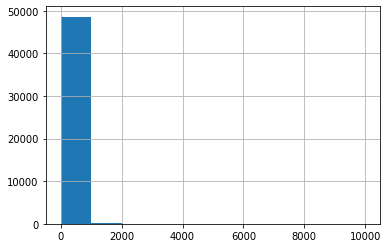

In [6]:
df['price'].hist()

E5. Using a condition to restrict the histogram to display only those prices less than \$500 to make it effiecient.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54fc4a4c10>,
      dtype=object)

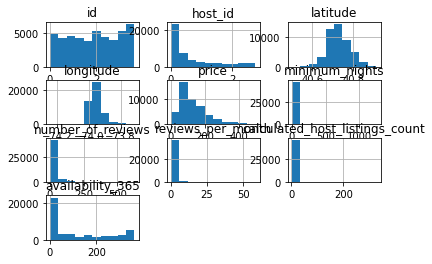

In [7]:
cond=df['price']<500
df[cond].hist()

E6. Repeating the previous exercise, but using 100 bins instead of the default number of bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54fbdf5810>,
      dtype=object)

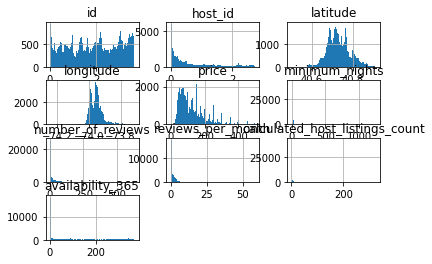

In [8]:
cond=df['price']<500
df[cond].hist(bins=100)

E7. Selecting those apartments whose price is at least 20 times the median price. Displayed all columns for those apartments.

In [9]:
import statistics
apar= df['price']>=20*(statistics.median(df['price']))
df[apar]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NaN,NaN,1,365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,NaN,1,83
2018,893413,Architecturally Stunning Former Synagogue!,4751930,Martin,Manhattan,East Village,40.72668,-73.98179,Entire home/apt,2500,30,15,2019-07-01,0.26,1,89
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45866,34981637,bay ridge & sunset park furnished apartment,263564234,Nony,Brooklyn,Bay Ridge,40.63087,-74.02006,Entire home/apt,4200,60,0,NaN,NaN,1,90
46532,35297214,Amazing Chelsea 4BR Loft!,256649546,Viberlyn,Manhattan,Chelsea,40.73999,-73.99806,Entire home/apt,2995,30,1,2019-06-24,1.00,1,214
46613,35345358,Northside Williamsburg Stunner,956324,Alex,Brooklyn,Williamsburg,40.71705,-73.96470,Entire home/apt,4500,30,0,NaN,NaN,1,365
48042,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365


E8. Selected those apartments whose price is at least 20 times the median price, but this time display only the `neighbourhood_group`,`neighbourhood` and `price` columns for those rows.

In [10]:
import statistics
apar= df['price']>=20*(statistics.median(df['price']))
col=['neighbourhood_group','neighbourhood','price']
df[apar][col]

,neighbourhood_group,neighbourhood,price
946,Manhattan,Upper West Side,3000
1862,Brooklyn,Prospect Heights,4000
2018,Manhattan,East Village,2500
2698,Manhattan,Nolita,5000
3537,Manhattan,Upper West Side,6000
...,...,...,...
45866,Brooklyn,Bay Ridge,4200
46532,Manhattan,Chelsea,2995
46613,Brooklyn,Williamsburg,4500
48042,Manhattan,Tribeca,6500


E9. Selected those apartments whose price is in the range \$200 to \$300, inclusive. Sorted the results in descending order by `minimum_nights`. Displayed all columns.

In [11]:
apart=(df['price'] >= 200) & (df['price']<= 300).sort_values(ascending=False)
df[apart],['minimum_nights']

(             id  ... availability_365
 1          2595  ...              355
 5          5099  ...              129
 16         7097  ...              321
 20         7801  ...                0
 52        14290  ...              140
 ...         ...  ...              ...
 48840  36453030  ...               12
 48843  36453952  ...              365
 48852  36455917  ...               84
 48871  36476675  ...                9
 48885  36483010  ...              176
 
 [6428 rows x 16 columns], ['minimum_nights'])

E10. Created a boxplot of apartment prices, restricted the range of prices to the \$200-\$300 price range,  inclusive.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


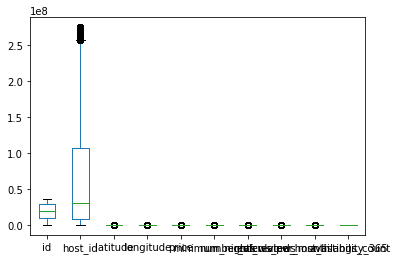

In [12]:
df.plot.box(apart)

E11. Created another boxplot of apartment prices, but restricted the query to private rooms in the \$200-\$300 price range, inclusive. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


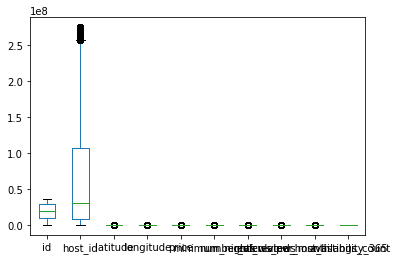

In [13]:

df.plot.box(apart & df['room_type']=='Private room')

E12. Grouped the apartments priced \$200-\$300 (inclusive) using the `neighbourhood_group` attribute and displayed the size of each group.

In [14]:
df.groupby([apart,'neighbourhood_group']).size()

price  neighbourhood_group
False  Bronx                   1061
       Brooklyn               18336
       Manhattan              17357
       Queens                  5362
       Staten Island            350
True   Bronx                     30
       Brooklyn                1767
       Manhattan               4304
       Queens                   304
       Staten Island             23
dtype: int64

E13. Grouped the apartments priced \$200-$300 (inclusive) using the `room_type` attribute and displayed the size of each group.

In [15]:
df.groupby([apart,'room_type']).size()

price  room_type      
False  Entire home/apt    19537
       Private room       21796
       Shared room         1133
True   Entire home/apt     5872
       Private room         529
       Shared room           27
dtype: int64

E14. Displayed how many of each type of room priced \$200-\$300 (inclusive) is available in each borough (`neighbourhood_group`).

In [16]:
df.groupby([apart,'neighbourhood_group']).size()

price  neighbourhood_group
False  Bronx                   1061
       Brooklyn               18336
       Manhattan              17357
       Queens                  5362
       Staten Island            350
True   Bronx                     30
       Brooklyn                1767
       Manhattan               4304
       Queens                   304
       Staten Island             23
dtype: int64

E15. Created a stacked bar chart that shows how many of each type of room priced \$200-\$300 (inclusive) is available in each borough (`neighbourhood_group`).

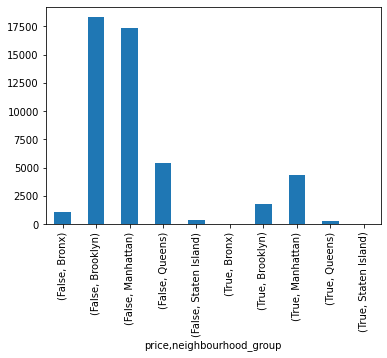

In [17]:
df.groupby([apart,'neighbourhood_group']).size().plot.bar(stacked=True)

E16. Created a stacked bar chart that shows how many private rooms and shared rooms (only) priced \$200-\$300 (inclusive) are available in each borough (`neighbourhood_group`).

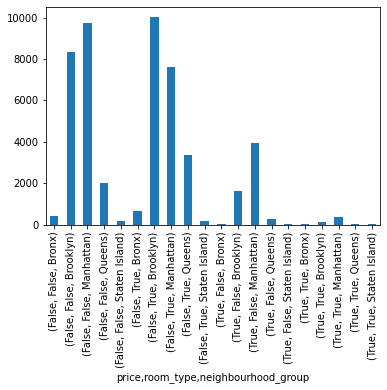

In [18]:
claf=df['room_type']=='Private room'
df.groupby([apart,claf,'neighbourhood_group']).size().plot.bar(stacked=True)

E17. Generated a list of all the neighborhoods inside Manhattan where apartments are available for rent with a count of how many apartments are available in each neighborhood. 


In [19]:
df.groupby(['price','neighbourhood_group']).size()

price  neighbourhood_group
0      Bronx                  1
       Brooklyn               9
       Manhattan              1
10     Bronx                  1
       Brooklyn               6
                             ..
8500   Manhattan              1
9999   Manhattan              3
10000  Brooklyn               1
       Manhattan              1
       Queens                 1
Length: 1542, dtype: int64